CREDIT CARD FRAUD DETECTION

Author: Divyanshi Sharma

Batch: November

Domain: Data Science

IMPORTING IMPORTANT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import os
import warnings

In [ ]:
data=pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data=data.sample(frac=0.1,random_state=48)
print(data.shape)
print(data.describe())

(1594, 31)
               Time           V1           V2           V3           V4  \
count   1594.000000  1594.000000  1594.000000  1594.000000  1594.000000   
mean   12392.370765    -0.221335     0.276134     0.807833     0.327845   
std     9056.722960     1.674051     1.388202     1.564543     1.477797   
min        0.000000   -15.903635   -13.792197   -19.133602    -3.774039   
25%     3749.250000    -0.961499    -0.301382     0.378824    -0.579109   
50%    11048.000000    -0.306353     0.229985     0.948262     0.227202   
75%    20988.500000     1.167813     0.904313     1.553178     1.182121   
max    27369.000000     1.580440    10.393917     4.079168     8.617895   

                V5           V6           V7           V8           V9  ...  \
count  1594.000000  1594.000000  1594.000000  1594.000000  1594.000000  ...   
mean     -0.131207     0.066706    -0.156963     0.021270     0.817649  ...   
std       1.237334     1.243846     1.119138     1.042499     1.247459  ... 

In [ ]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
outlierFraction=len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases:{}'.format(len(data[data['Class']==1])))
print('Valid Transactions:{}'.format(len(data[data['Class']==0])))

0.0031466331025802393
Fraud Cases:5
Valid Transactions:1589


In [ ]:
print("Amount details of the fraudlent transaction")
fraud.Amount.describe()

Amount details of the fraudlent transaction


count      5.000000
mean     173.870000
std      333.974088
min        1.000000
25%        1.000000
50%        1.000000
75%       99.990000
max      766.360000
Name: Amount, dtype: float64

In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    1589.000000
mean       62.517413
std       170.077590
min         0.000000
25%         5.490000
50%        15.950000
75%        52.950000
max      4000.000000
Name: Amount, dtype: float64

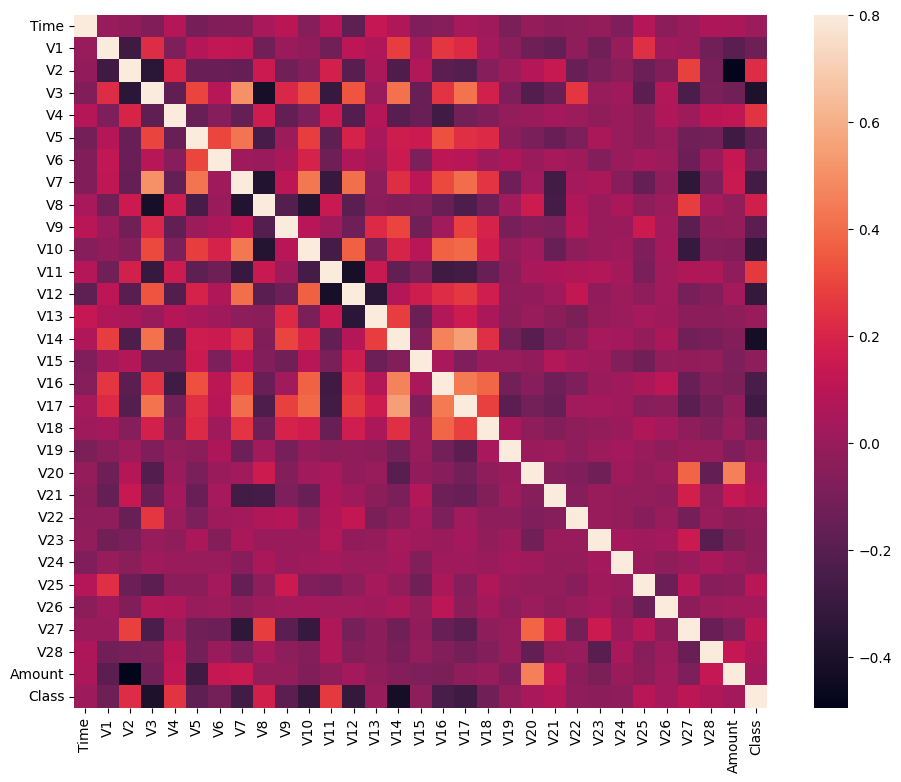

In [ ]:
corrat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrat,vmax=.8,square=True)
plt.show()

In [ ]:
X=data.drop(['Class'],axis=1)
Y=data["Class"]
print(X.shape)
print(Y.shape)
xdata=X.values
ydata=Y.values

(1594, 30)
(1594,)


In [ ]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(xdata,ydata,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xTrain,yTrain)
yPred=rfc.predict(xTest)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers=len(fraud)
n_errors=(yPred!=yTest).sum()
print("The model used is Random Forest classifier")
acc=accuracy_score(yTest, yPred)
print("The accuracyis{}".format(acc))
prec=precision_score(yTest, yPred)
print("The precision is{}".format(prec))
rec=recall_score(yTest, yPred)
print("The recall is{}".format(rec))
f1=f1_score(yTest, yPred)
print("The F1-Score is{}".format(f1))
MCC=matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracyis0.9968652037617555
The precision is1.0
The recall is0.5
The F1-Score is0.6666666666666666
The Matthews correlation coefficient is0.7059941026354078


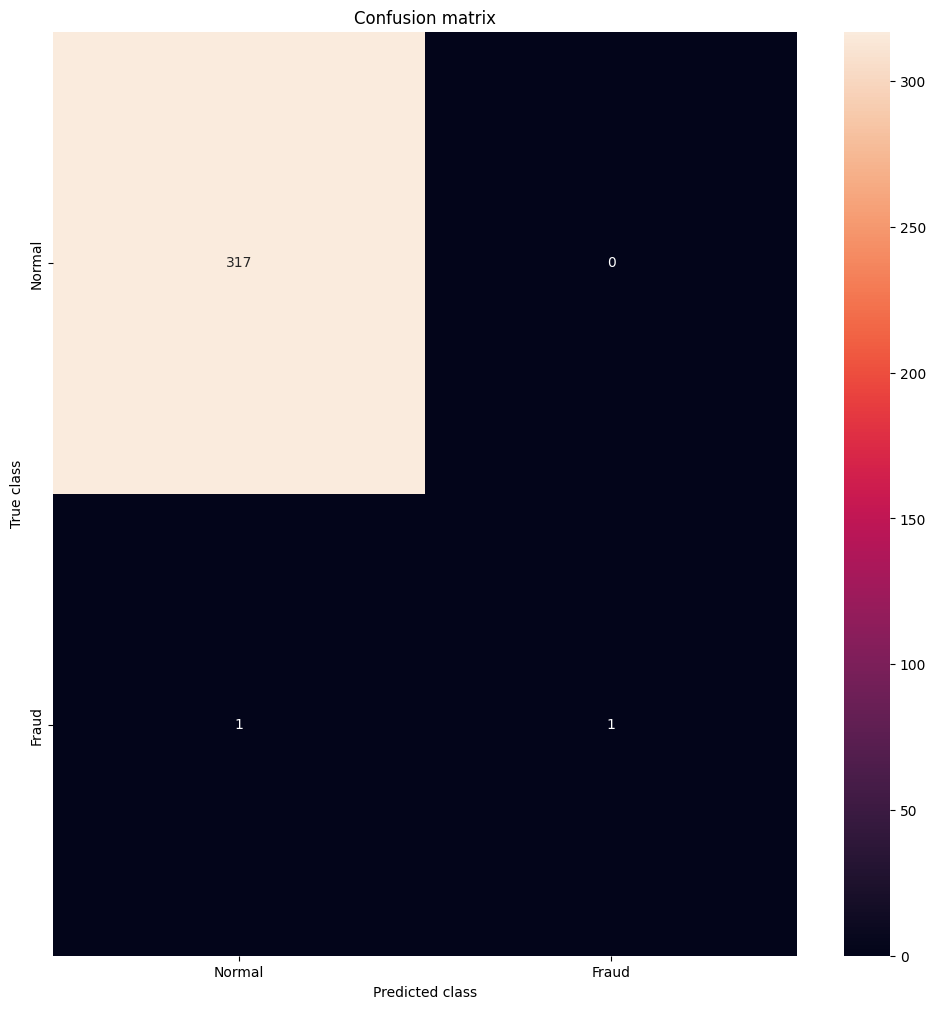

In [ ]:
LABELS=['Normal','Fraud']
conf_matrix=confusion_matrix(yTest,yPred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix,xticklabels=
LABELS,
     yticklabels=LABELS,annot=
True,fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

